# Import libraries and datasets

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
#import data
# data source: https://insideairbnb.com/get-the-data
# San Francisco, California, United States data as of 07 March, 2024

calendar = pd.read_csv("/content/drive/My Drive/Airbnb_SF_data/calendar.csv")

listings_detailed = pd.read_csv("/content/drive/My Drive/Airbnb_SF_data/listings_detailed.csv")

<ipython-input-86-b546239adda0>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv("/content/drive/My Drive/Airbnb_SF_data/calendar.csv")


## EDA

In [ ]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2024-03-07,f,$170.00,NaN,2.0,1125.0
1,958,2024-03-08,f,$170.00,NaN,2.0,1125.0
2,958,2024-03-09,f,$170.00,NaN,2.0,1125.0
3,958,2024-03-10,f,$170.00,NaN,2.0,1125.0
4,958,2024-03-11,f,$170.00,NaN,2.0,1125.0


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051960 entries, 0 to 3051959
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 163.0+ MB


In [ ]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,3.051960e+06,3.051959e+06,3.051959e+06
mean,3.674022e+17,2.013793e+01,6.486271e+06
std,4.484375e+17,4.839123e+01,1.178361e+08
min,9.580000e+02,1.000000e+00,1.000000e+00
25%,2.295335e+07,2.000000e+00,8.900000e+01
50%,4.880564e+07,3.000000e+00,3.650000e+02
75%,8.509991e+17,3.000000e+01,1.125000e+03
max,1.105980e+18,1.125000e+03,2.147484e+09


In [ ]:
listings_detailed.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1094764,https://www.airbnb.com/rooms/1094764,20240307173410,2024-03-07,city scrape,San Francisco Presidio Paradise!,NaN,NaN,https://a0.muscache.com/pictures/16468522/1292...,172460,...,5.0,5.0,5.0,NaN,f,2,2,0,0,0.03
1,38047206,https://www.airbnb.com/rooms/38047206,20240307173410,2024-03-07,previous scrape,52 Vesta home,NaN,NaN,https://a0.muscache.com/pictures/6726f7cf-73aa...,92965890,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,43475468,https://www.airbnb.com/rooms/43475468,20240307173410,2024-03-07,previous scrape,Beautiful Mission District Home and Backyard,Beautiful entire first floor of home with back...,NaN,https://a0.muscache.com/pictures/f196cbea-2500...,65136730,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,648549709021440854,https://www.airbnb.com/rooms/648549709021440854,20240307173410,2024-03-07,city scrape,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,"This house is well-maintained, and has upgrade...",The neighborhood is on a quiet street with fam...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,...,5.0,5.0,5.0,2022-003280STR,f,13,2,11,0,0.33
4,47918229,https://www.airbnb.com/rooms/47918229,20240307173410,2024-03-07,city scrape,"Blueground | Marina District, w/d, nr parks",Feel at home wherever you choose to live with ...,This furnished apartment is located in the dre...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,...,NaN,NaN,NaN,NaN,f,183,183,0,0,NaN


In [ ]:
listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8361 non-null   int64  
 1   listing_url                                   8361 non-null   object 
 2   scrape_id                                     8361 non-null   int64  
 3   last_scraped                                  8361 non-null   object 
 4   source                                        8361 non-null   object 
 5   name                                          8361 non-null   object 
 6   description                                   8227 non-null   object 
 7   neighborhood_overview                         5732 non-null   object 
 8   picture_url                                   8361 non-null   object 
 9   host_id                                       8361 non-null   i

In [ ]:
listings_detailed.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.361000e+03,8.361000e+03,8.361000e+03,8361.000000,8361.000000,0.0,8361.000000,8361.000000,8361.000000,6769.000000,...,6192.000000,6191.000000,6192.000000,6191.000000,6191.000000,8361.000000,8361.000000,8361.000000,8361.000000,6197.000000
mean,3.674627e+17,2.024031e+13,1.656404e+08,214.380696,255.607822,NaN,37.770197,-122.429440,3.144959,1.294948,...,4.748064,4.866015,4.849714,4.760859,4.651207,45.134912,10.159191,34.517641,0.288961,1.233463
std,4.484912e+17,0.000000e+00,1.917615e+08,795.814170,938.763770,NaN,0.022881,0.026590,1.943469,0.694551,...,0.489014,0.376969,0.404583,0.451871,0.495608,102.995608,33.440351,100.529657,1.929309,1.772611
min,9.580000e+02,2.024031e+13,1.169000e+03,1.000000,1.000000,NaN,37.708480,-122.512460,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.295335e+07,2.024031e+13,7.895922e+06,1.000000,2.000000,NaN,37.755540,-122.440610,2.000000,1.000000,...,4.720000,4.890000,4.880000,4.750000,4.600000,1.000000,0.000000,0.000000,0.000000,0.180000
50%,4.880564e+07,2.024031e+13,7.072202e+07,4.000000,6.000000,NaN,37.776110,-122.421594,2.000000,1.000000,...,4.910000,4.970000,4.980000,4.890000,4.780000,3.000000,1.000000,0.000000,0.000000,0.510000
75%,8.509991e+17,2.024031e+13,3.047215e+08,36.000000,62.000000,NaN,37.788415,-122.411120,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.910000,21.000000,2.000000,4.000000,0.000000,1.640000
max,1.105980e+18,2.024031e+13,5.650002e+08,5040.000000,8912.000000,NaN,37.809810,-122.358480,16.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,379.000000,183.000000,378.000000,26.000000,34.690000


# Insights

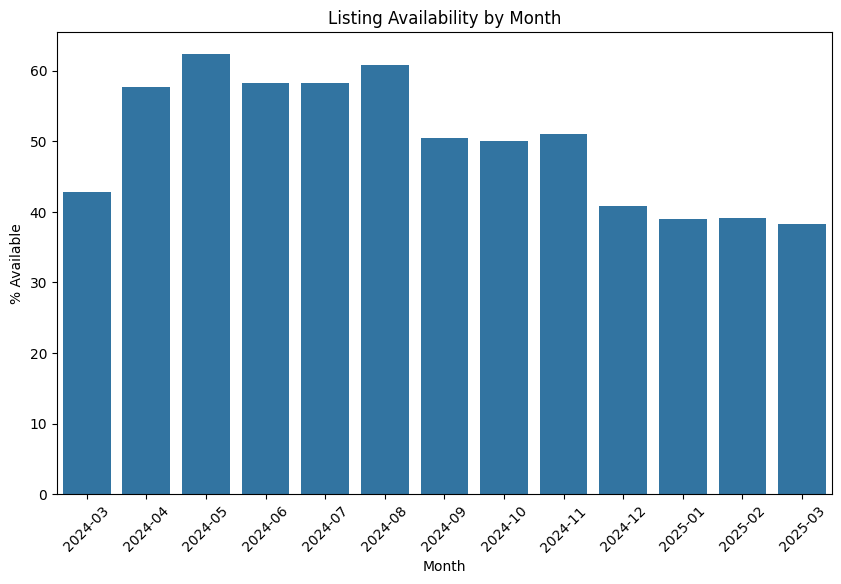

In [ ]:
# Convert the 'date' to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

# change the date type of 'available' column
calendar['available'] = calendar['available'].map({'t': 1, 'f': 0})

# Extract year_month from 'date' column
calendar['year_month'] = calendar['date'].dt.to_period('M')

# Create a bar chart about '% available' by month
monthly_availability = calendar.groupby('year_month')['available'].mean()*100

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_availability.index, y=monthly_availability.values)
plt.xlabel('Month')
plt.ylabel('% Available')
plt.title('Listing Availability by Month')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

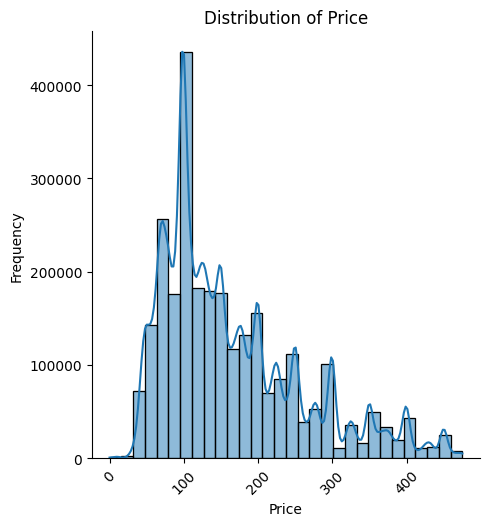

In [ ]:
# convert 'price' to float
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

# remove data points whose 'price' are outliers
quartile1 = calendar['price'].quantile(0.25)
quartile3 = calendar['price'].quantile(0.75)
iqr = quartile3 - quartile1
upper_limit = quartile3 + 1.5 * iqr
lower_limit = quartile1 - 1.5 * iqr

price_outliers_removed=calendar[(calendar['price']<upper_limit) & (calendar['price']>lower_limit)]

# Create a histogram of 'price' after removing outliers
plt.figure(figsize=(10, 6))
sns.displot(price_outliers_removed, x='price', bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.xticks(rotation=45)
plt.show()

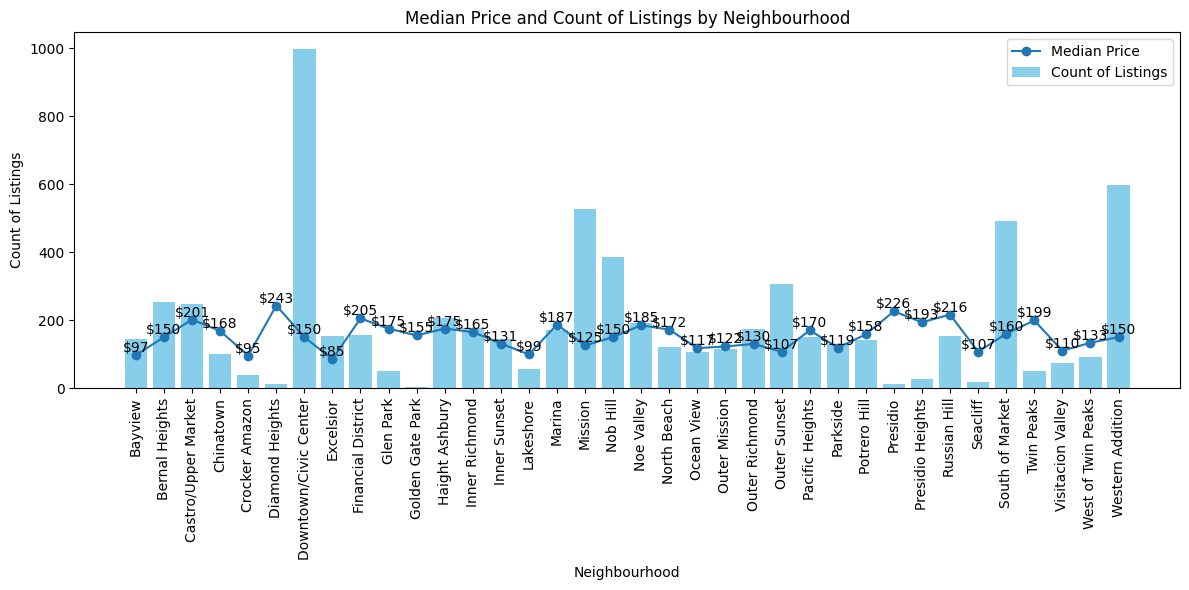

In [ ]:

# convert 'price' to float
listings_detailed['price'] = listings_detailed['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Get the median price per neighbourhood
median_price_per_neighbourhood = listings_detailed.groupby('neighbourhood_cleansed')['price'].median()

# Get the count of listings per neighbourhood and sort by count
count_of_listings_per_neighbourhood = listings_detailed.groupby('neighbourhood_cleansed')['price'].count()
count_of_listings_per_neighbourhood = count_of_listings_per_neighbourhood.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot Median Price
plt.plot(median_price_per_neighbourhood.index, median_price_per_neighbourhood.values, label='Median Price', marker='o')

# Show data value (label) of price on the line plot
for i, value in enumerate(median_price_per_neighbourhood.values):
    plt.text(i, value, f"${int(value)}", ha='center', va='bottom')

# Plot Count of listings
plt.bar(count_of_listings_per_neighbourhood.index, count_of_listings_per_neighbourhood.values, label='Count of Listings', color='skyblue')

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Listings')
plt.title('Median Price and Count of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Price prediction model

## data cleaning

In [ ]:


# convert 'host_acceptance_rate' to 0-5 scale
listings_detailed['host_acceptance_rate']=listings_detailed['host_acceptance_rate'].str.replace('%', '').astype(float)/20

# convert 'minimum_nights' to dummary variable (min_nights_greater_than_one_week)
def min_nights_greater_than_one_week (x):
  if x>7:
    return 1
  else:
    return 0

listings_detailed['min_nights_greater_than_one_week']=listings_detailed['minimum_nights'].apply(min_nights_greater_than_one_week)


# create 'host_tenure' variable
listings_detailed['host_since'] = pd.to_datetime(listings_detailed['host_since'])
a=listings_detailed['host_since'].dt.to_period('Y')
year_int=a.astype(int)
listings_detailed['host_tenure']=54-year_int

# create 'South_of_Market_neighbourhood' variable
def south_of_market(r):
  if r=='South of Market':
    return 1
  else:
    return 0

listings_detailed['South_of_Market_neighbourhood']=listings_detailed['neighbourhood_cleansed'].apply(south_of_market)


# create 'Western_Addition_neighbourhood' variable
def western_addition(r):
  if r=='Western Addition':
    return 1
  else:
    return 0
listings_detailed['Western_Addition_neighbourhood']=listings_detailed['neighbourhood_cleansed'].apply(western_addition)


# convert 'room type' to dummary variable
listings_detailed['entire_home']=listings_detailed['room_type'].map({'Entire home/apt': 1, 'Private room': 0, 'Shared room': 0, 'Hotel room':0})

# create 'free parking' variable
listings_detailed['free_parking'] = listings_detailed['amenities'].str.contains('parking').map({True: 1, False: 0})


In [ ]:
# remove data points whose 'price' are outliers
quartile1 = listings_detailed['price'].quantile(0.25)
quartile3 = listings_detailed['price'].quantile(0.75)
iqr = quartile3 - quartile1
upper_limit = quartile3 + 1.5 * iqr
lower_limit = quartile1 - 1.5 * iqr

listings_detailed_price_outliers_removed=listings_detailed[(listings_detailed['price']<upper_limit) & (listings_detailed['price']>lower_limit)]


In [ ]:
# final selected variables are the following (after multiple runs of iteration)

df=listings_detailed_price_outliers_removed[[
'accommodates',
'review_scores_location',
'reviews_per_month',
'host_acceptance_rate',
'min_nights_greater_than_one_week',
'host_tenure',
'South_of_Market_neighbourhood',
'Western_Addition_neighbourhood',
'entire_home',
'free_parking',
'price']   ]

df=df.dropna()

## Linear Regression

In [ ]:
X = df.drop('price',  axis =1 )
X = sm.add_constant(X)
y=df['price']

# build model
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     412.3
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        03:40:46   Log-Likelihood:                -24445.
No. Observations:                4439   AIC:                         4.891e+04
Df Residuals:                    4428   BIC:                         4.898e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<Axes: >

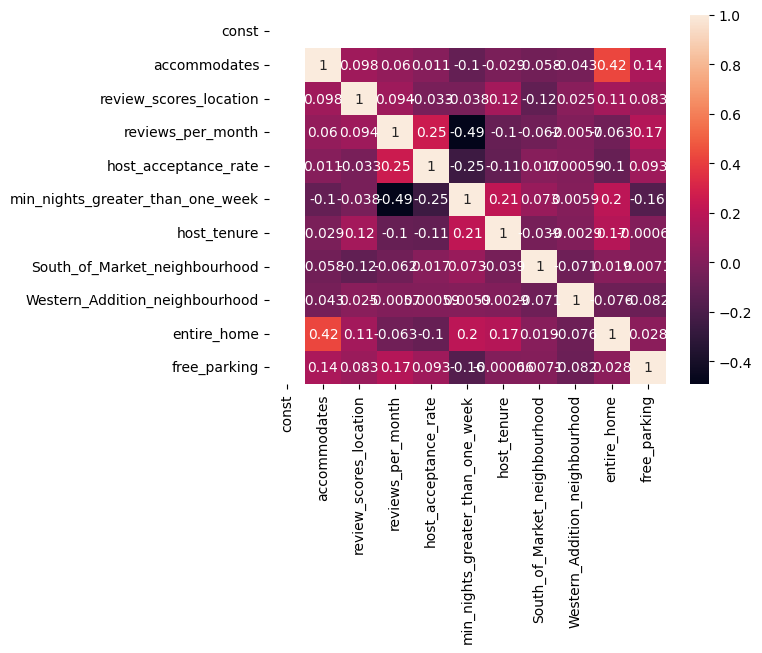

In [ ]:
# check Multicollinearity
sns.heatmap(X.corr(), annot=True)

In [ ]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#get r2 score
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.48261420608256034

In [ ]:
#mean_absolute_error
mean_absolute_error(y_test, y_pred)

44.86066773354313

In [ ]:
#mean_squared_error
mean_squared_error(y_test, y_pred)

3570.3533099835226

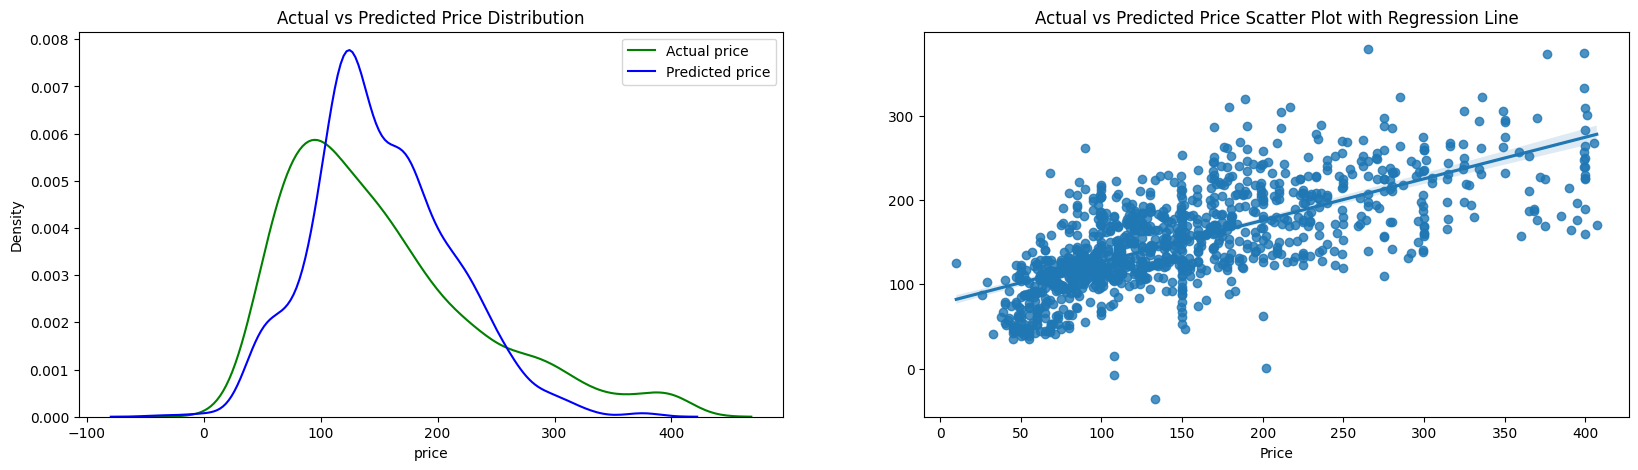

In [ ]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual price')
ax2 = sns.kdeplot(data=y_pred, color="b", label='Predicted price')
plt.title('Actual vs Predicted Price Distribution')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Price Scatter Plot with Regression Line')
plt.xlabel('Price');

## Random Forest Regression

In [ ]:
# random forest regression

ran = RandomForestRegressor(n_estimators=80, random_state=42)
ran.fit(X_train, y_train)

y_pred = ran.predict(X_test)


In [ ]:
#get r2 score
r2_score(y_test, y_pred)

0.5482857209456056

In [ ]:
#mean_absolute_error
mean_absolute_error(y_test, y_pred)

39.222414168632916

In [ ]:
#mean_squared_error
mean_squared_error(y_test, y_pred)

3117.1701858633414

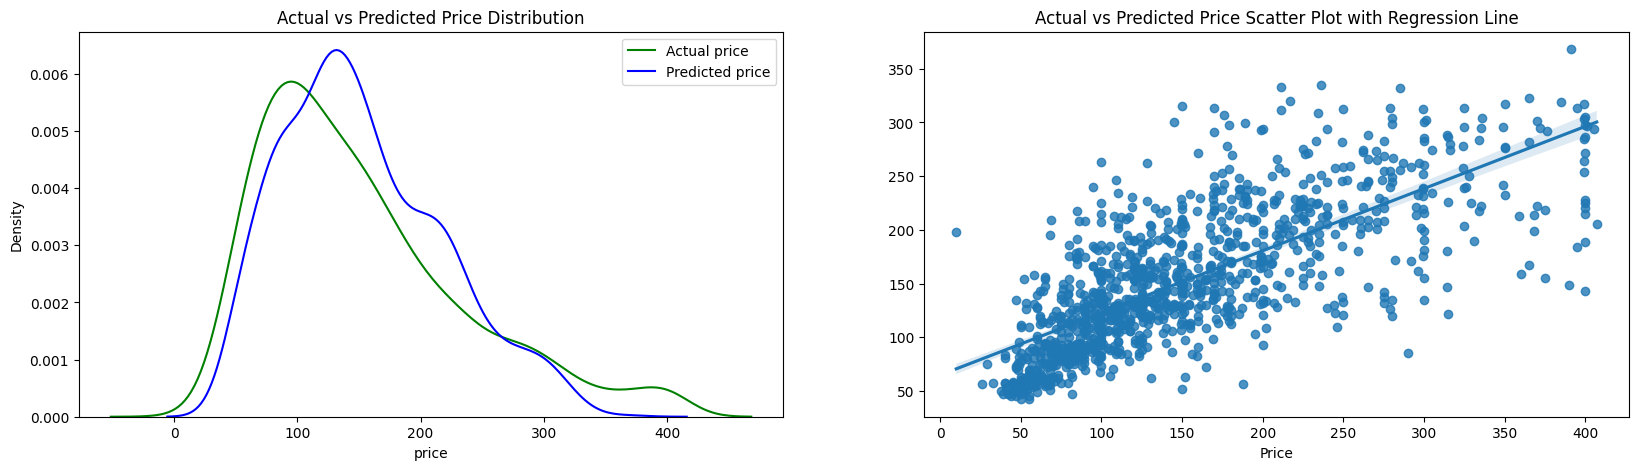

In [ ]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual price')
ax2 = sns.kdeplot(data=y_pred, color="b", label='Predicted price')
plt.title('Actual vs Predicted Price Distribution')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Price Scatter Plot with Regression Line')
plt.xlabel('Price');